In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
img_inf = cv2.imread('../Hackathon/Ultasonic/data/train/infected/img1.jpg')
img_inf = cv2.cvtColor(img_inf,cv2.COLOR_BGR2RGB)

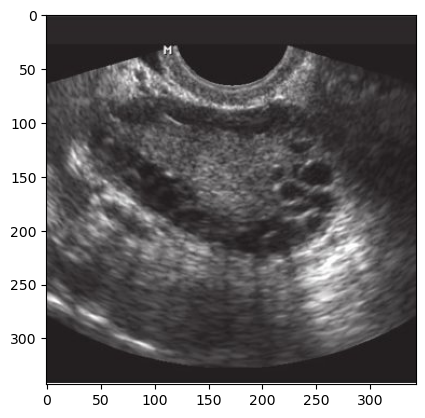

In [4]:
plt.imshow(img_inf)

In [5]:
img_nf = cv2.imread('../Hackathon/Ultasonic/data/train/notinfected/img3.jpg')
img_nf = cv2.cvtColor(img_nf,cv2.COLOR_BGR2RGB)

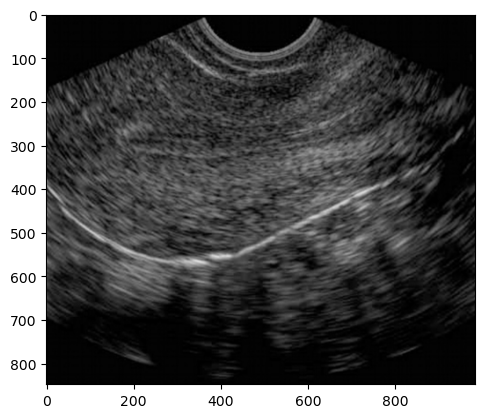

In [6]:
plt.imshow(img_nf)

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
image_gen = ImageDataGenerator(rotation_range=30, 
                               width_shift_range=0.1, 
                               height_shift_range=0.1, 
                               rescale=1/255,
                               shear_range=0.2, 
                               zoom_range=0.2, 
                               horizontal_flip=True,
                               fill_mode='nearest' 
                              )

In [9]:
image_gen.flow_from_directory('../Hackathon/Ultasonic/data/train/')

Found 1924 images belonging to 2 classes.


In [10]:
image_gen.flow_from_directory('../Hackathon/Ultasonic/data/test/')

Found 1922 images belonging to 2 classes.


In [11]:
image_shape = (120,120,3)

In [12]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [13]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(120,120,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(120,120,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(120,120,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 118, 118, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0

In [15]:
batch_size = 7

train_image_gen = image_gen.flow_from_directory('../Hackathon/Ultasonic/data/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 1924 images belonging to 2 classes.


In [16]:
test_image_gen = image_gen.flow_from_directory('../Hackathon/Ultasonic/data/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 1922 images belonging to 2 classes.


In [17]:
train_image_gen.class_indices

{'infected': 0, 'notinfected': 1}

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
results = model.fit_generator(train_image_gen,epochs=10,
                              validation_data=test_image_gen,
                             validation_steps=16)

Epoch 1/10
275/275 [==============================] - 94s 236ms/step - loss: 0.3440 - accuracy: 0.8312 - val_loss: 0.0901 - val_accuracy: 0.9643
Epoch 2/10
275/275 [==============================] - 39s 141ms/step - loss: 0.0346 - accuracy: 0.9910 - val_loss: 0.0353 - val_accuracy: 1.0000
Epoch 3/10
275/275 [==============================] - 40s 146ms/step - loss: 0.0308 - accuracy: 0.9950 - val_loss: 2.9208e-04 - val_accuracy: 1.0000
Epoch 4/10
275/275 [==============================] - 39s 143ms/step - loss: 0.0145 - accuracy: 0.9943 - val_loss: 0.0301 - val_accuracy: 0.9911
Epoch 5/10
275/275 [==============================] - 40s 145ms/step - loss: 0.0086 - accuracy: 0.9962 - val_loss: 2.8990e-04 - val_accuracy: 1.0000
Epoch 6/10
275/275 [==============================] - 42s 152ms/step - loss: 0.0356 - accuracy: 0.9924 - val_loss: 3.2498e-04 - val_accuracy: 1.0000
Epoch 7/10
275/275 [==============================] - 39s 143ms/step - loss: 0.0180 - accuracy: 0.9965 - val_loss: 0.0

In [25]:
results

In [26]:
results.history

{'loss': [0.1634831577539444,
  0.04056180268526077,
  0.02207234501838684,
  0.013333232142031193,
  0.004346450790762901,
  0.0693037286400795,
  0.028345389291644096,
  0.011605910025537014,
  0.004251786973327398,
  0.004917391110211611],
 'accuracy': [0.9319126605987549,
  0.9896050095558167,
  0.9953222274780273,
  0.9948024749755859,
  0.9979209899902344,
  0.9870062470436096,
  0.9953222274780273,
  0.9968814849853516,
  0.9984407424926758,
  0.997401237487793],
 'val_loss': [0.09006606042385101,
  0.03533049300312996,
  0.0002920822298619896,
  0.030142128467559814,
  0.0002899047394748777,
  0.00032497895881533623,
  0.0022821780294179916,
  0.0001864354417193681,
  0.0012314609484747052,
  0.00017151798238046467],
 'val_accuracy': [0.9642857313156128,
  1.0,
  1.0,
  0.9910714030265808,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0]}

In [27]:
train_image_gen.class_indices

{'infected': 0, 'notinfected': 1}

In [28]:
import numpy as np
from keras.preprocessing import image

file = '../Hackathon/Ultasonic/data/test/infected/img5.jpg'
check = cv2.imread(file)
check = cv2.cvtColor(check,cv2.COLOR_BGR2RGB)

img = image.load_img(file, target_size=(120, 120))

img = image.img_to_array(img)

img = np.expand_dims(img, axis=0)
img = img/255

In [29]:
r=model.predict_classes(img)
if r==0:
    text='infected'
else:
    text='notinfected'

In [1]:
preprocess_image(img)

NameError: name 'preprocess_image' is not defined

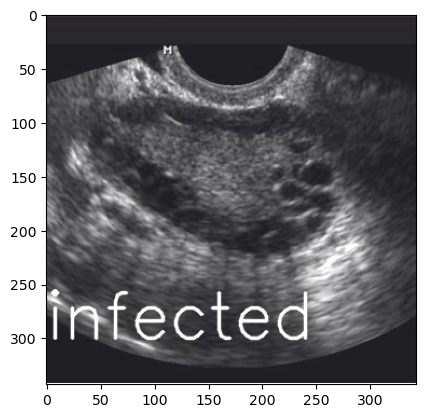

In [30]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(check,text=text,org=(0,300), fontFace=font,fontScale= 2,color=(255,255,255),thickness=2,lineType=cv2.LINE_AA)
plt.imshow(check)

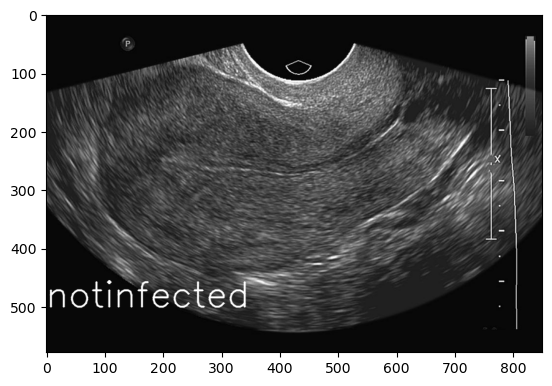

In [36]:
file = '../Hackathon/Ultasonic/data/test/notinfected/img2.png'
check = cv2.imread(file)
check = cv2.cvtColor(check,cv2.COLOR_BGR2RGB)

img = image.load_img(file, target_size=(120, 120))

img = image.img_to_array(img)

img = np.expand_dims(img, axis=0)
img = img/255
r=model.predict_classes(img)
if r==0:
    text='infected'
else:
    text='notinfected'
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(check,text=text,org=(0,500), fontFace=font,fontScale= 2,color=(255,255,255),thickness=2,lineType=cv2.LINE_AA)
plt.imshow(check)

In [38]:
import pickle


In [39]:
model.save('Ultrasonics_Pcos.h5')